# Data analysis with Python

## importar CSV

In [ ]:
import pandas as pd
url = "poner aquí el link o dirección"
df = pd.read_csv(url) # Se asume que tiene el encabezado incluido
df = pd.read_csv(url, header=None) #Aquí ya no se asume
df.head(n) #Recordar que esto imprime solo las primeras n filas
df.tail(n) #Imprime las últimas n filas
encabezado = ["Nombre 1","Nombre 2","Nombre 3"]
df.columns = encabezado #En caso de que no haya encabezado, con esto se asignan los nombres, con df.head() se puede ver el cambio
print(df.columns) #Ver nombres de columnas
guardaren = "C:/Windows.../nombredelarchivo.csv"
df.to_csv(guardaren) #Así se guarda el archivo
df.to_excel(guardaren, index=False) #Guardar sin índice en excel
df.to_json(guardaren)
df.to_sql(guardaren)

import numpy as np #Utilizar de aquí para abajo para tomar "?" y ponerlos como np.nan(NaN) 

# replace "?" to NaN
df.replace("?", np.nan, inplace = True)
df.head(5)

missing_data = df.isnull()#Esto es para mostrar los valores faltantes como True y los no faltantes como false
missing_data.head(5)

for column in missing_data.columns.values.tolist(): #Toma columna por columna y dice cuantos valores NO faltantes hay
    print(column)
    print (missing_data[column].value_counts())
    print("")  

In [ ]:
import pandas as pd
url = "poner aquí el link o dirección"
df = pd.read_csv(url) # Se asume que tiene el encabezado incluido
df.describe() #Describe las columna con datos importantes, como la media, desvest, cuartiles, max, min.
df.describe(include="all") #Resumen completo a todas las columnas, para strings sale como NaN (Not a number)
df[["length","compression-ratio"]].describe() #También se puede emplear la selección por nombre de columnas
df.info() #Primeras y últimas 30 filas
print(df.dtypes) #Obtener tipos de datos para las columnas

<h2>Leer/Guardar en otros formatos</h2>

| Formato |        Leer      |        Guardar    |
| ------------ | :---------------: | --------------: |
| csv          |  `pd.read_csv()`  |   `df.to_csv()` |
| json         |  `pd.read_json()` |  `df.to_json()` |
| excel        | `pd.read_excel()` | `df.to_excel()` |
| hdf          |  `pd.read_hdf()`  |   `df.to_hdf()` |
| sql          |  `pd.read_sql()`  |   `df.to_sql()` |
| ...          |        ...        |             ... |

## Pre-processing

### Operaciones simples

In [ ]:
df["Nombre columna"] = df["Nombre columna"]+1 #Añade 1 a todos los datos de la columna

df["city-mpg"] = 235/df["city-mpg"] #Conversión de datos
df.rename(columns={"city_mpg":"city-L/100km"}, inplace = True) #Y se cambia el nombre de la columna con las unidades correspondientes

### Remover valores faltantes

In [ ]:
df.dropna(axis=0) #Útil para verificar todas las filas con datos faltantes
df.dropna(["price"], axis=0) #Esto no modifica el dataframe, pero sirve para verificar los datos
df.dropna(["price"], axis=0, inplace = True) #Busca en la columna price y si hay un valor faltante, elimina toda la fila
df = df.dropna(subset=["price"], axis=0) #Lo mismo, axis = 0 hace referencia a borrar la fila, 1 haría referencia a borrar la columna

### Reemplazar valores faltantes

In [ ]:
media = df["nombre columna"].mean() #Calcula la media, se puede emplear el parámero axis=1 para que dé la media de la fila
df["nombre columna"].replace(np.nan,media) #Para reemplazar el faltante con la media, nótese que usa numpy

### Formato de datos

In [ ]:
df["city-mpg"] = 235/df["city-mpg"] #Conversión de datos
df.rename(columns={"city_mpg":"city-L/100km"}, inplace = True) #Y se cambia el nombre de la columna con las unidades correspondientes

#A veces los números no son números sino objects y no int o float, identificar:
df.dtypes()
df.astype() #Convertir a otro tipo de dato
df["price"] = df["price"].astype("int") #Convertir a entero

### Normalización de datos

Se centra en realizar una ponderación "justa" de los datos, donde un dato muy alejado de la media no afecte en gran medida todo el análisis.

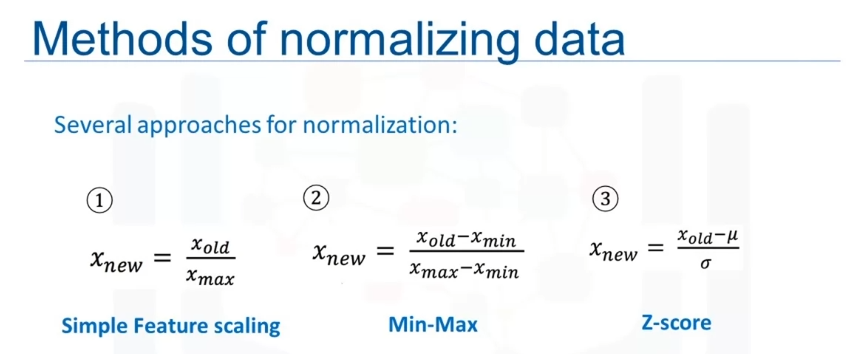

In [ ]:
#Usando el método simple: 
df["length"] = df["length"]/df["length"].max()
#Min-max:
df["length"] = (df["length"]-df["length"].min())/(df["length"].max()-df["length"].min())
#Z-score, este siempre da entre -3 y 3, cualquier otra cosa está mal:
df["length"] = (df["length"]-df["length"].mean())/df["length"].std() #Usando la media y desviación estándar

### Binning
Convierte las variables numéricas en categóricas asignándolas en grupos de acuerdo a su valor. Facilita la comprensión de la distribución.

In [ ]:
bins = np.linspace(min(df["price"]),max(df["price"]),4) #Se sacan 4 números equidistantes en un arreglo entre el máx y mín
group_names = ["Low","Medium","High"] #Se nombran las divisiones
df["price-binned"] = pd.cut(df["price"],bins,labels=group_names,include_lowest=True)

### Variables categoricas a cuantitativas

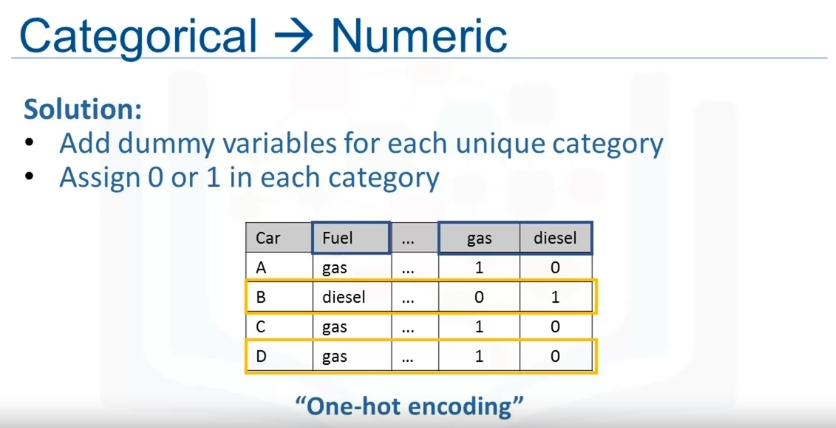

In [ ]:
#Para convertir a "dummy variables", se hace así:
pd.get_dummies(df['Nombre de la columna'])

### Ejemplos

In [ ]:
df['num-of-doors'].value_counts() #Retorna los distintos valores de la columna y dá el número de repeticiones, útil para variables categóricas
df['num-of-doors'].value_counts().idxmax() #Retorna el valor más repetido
df["num-of-doors"].replace(np.nan, "four", inplace=True) #Reemplazar por "four" las NaN, siendo "four" el valor más repetido

# Quitar las filas con valores de NaN en el precio, siendo la variable más importante
df.dropna(subset=["price"], axis=0, inplace=True)

# Resetear el índice luego de quitar las filas
df.reset_index(drop=True, inplace=True)

# dar formato correcto a los datos
df.dtypes #Se revisan los formatos actuales

# Se convierten los datos a un formato apropiado
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

#Se verifica
df.dtypes

# Se puede realizar un histograma para observar la forma de la distribución
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])
# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

# Se puede usar binning para separar las categorías según su valor numérico
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
group_names = ['Low', 'Medium', 'High']
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True ) 
df[['horsepower','horsepower-binned']].head(20) #Se imprimen las dos columnas para compararlas

#Se cuentan los valores de estas categorías
df["horsepower-binned"].value_counts()

#Se realiza una gráfica de barras, deben ser 3 columnas para tres categorías
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["horsepower-binned"].value_counts())
# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")


# También se puede realizar un histograma, el resultado es igual solo que con horsepower como variable x
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)
# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

# Se pueden extraer los dummy values para saber si el vehículo es de diesel o gas
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head() #Se imprimen dos columnas, una de diesel y otra de gas, con 1's y 0's para denotar el tipo
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head() #Se muestra lo mismo pero con el nombre de columna renovado
#IMPORTANTE
# Se unen los datos de "df" y "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)
# Se elimina la columna original ya que fue reemplazada por dummy variables
df.drop("fuel-type", axis = 1, inplace=True)
df.head()

## Análisis exploratorio

### Estadística descriptiva

In [ ]:
df.describe() #Muestra datos estadísticos para los valores numéricos en cada columna, si hay NaN's, son excluídos
df["nombre columna"].value_counts() #Lo de antes, para variables categóricas es más útil

df.describe(include=['object']) #Hace lo mismo para objects, con información de frecuencia

drive_wheels_counts = df["drive-wheels"].value_counts().to_frame() #Crea un frame con el nombre del valor a un lado y las repeticiones al otro
drive_wheels_counts.rename(columns={"drive-wheels":"value_counts"}, inplace=True) #Se le cambia el nombre a las columnas: "drive-wheels" y "value_counts"
drive_wheels_counts

#### Diagrama de caja

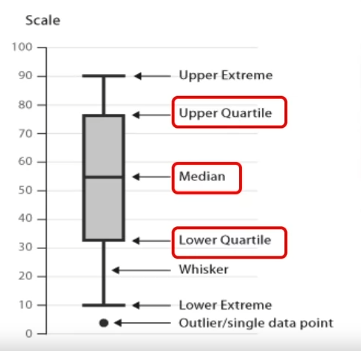


In [ ]:
import seaborn as sns
sns.boxplot(x = "drive wheels", y = "price", data = df) #Crea el diagrama de caja múltiple

#### Diagrama de disperción
Aquí es importante que las variables independientes se pongan en el eje x y las objetivo en y. Esto da un primer indicio de la relación entre las dos variables.

In [ ]:
y = df["precio"]
x = df["tamaño motor"]
plt.scatter(x,y)
plt.title("Aquí título")
plt.xlabel("Nombre x")
plt.ylabel("Nombre y")

### Agrupación de datos

#### Groupby

In [ ]:
df_test = df[['dirve-wheels','body-style','price']] #Frame de prueba
df_grp = df_test.groupby(['drive-wheels','body-style'], as_index=False).mean()
df_grp #Resulta en una tabla con todas las combinaciones de drive-wheels y body-style y el precio promedio de estas combinaciones

###### Salida
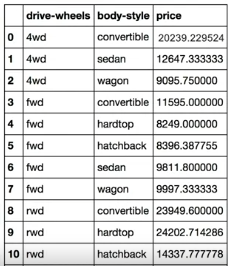

In [ ]:
df_gptest2 = df[['body-style','price']]
grouped_test_bodystyle = df_gptest2.groupby(['body-style'],as_index= False).mean() #Agrupa las categorías de body-style por promedio de precio
grouped_test_bodystyle

#### Tabla dinámica

Variables tanto en las columnas como en las filas

In [ ]:
# Se toma la agrupación anterior
df_pivot = df_grp.pivot(index = 'drive-wheels', columns = 'body-style')

###### Salida

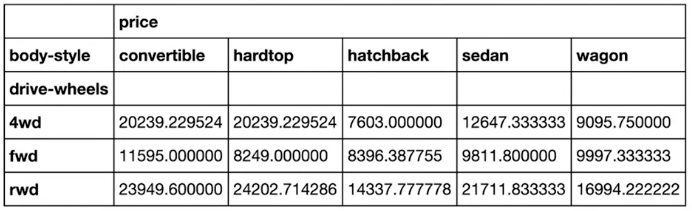

#### Mapa de calor

In [ ]:
plt.pcolor(df_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

###### Salida


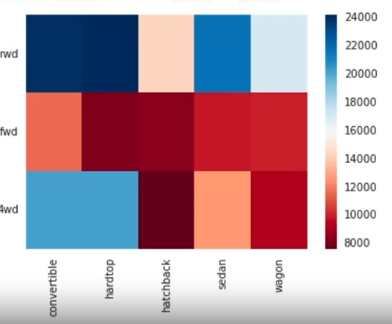

### Correlación

Mide qué tan interdependientes son las variables, esto no contempla la causalidad de las variables.

In [ ]:
sns.regplot(x = "engine-size", y = "price", data = df) #Ajusta los datos a un modelo de regresión lineal
plt.ylim(0,)

#### Coeficiente de correlación de Pearson

Coeficeinte de correlacion +1 es una gran relación positiva y -1 es una gran relación negativa, 0 es no relación.

p-valor:
* <0.001 Fuerte certeza del resultado
* <0.05 Certeza moderada del resultado
* <0.1 Certeza débil del resultado
* ">0.1 No hay certeza del resultado"

Entonces hay una fuerte correlación cuando el coeficiente de correlación es cercano a 1 y p-valor es <0.001

1.0 0.0 
    horsepower  price
0           1      2
1           2      4
2           3      6
3           4      8
4           5     10
5           6     12
6           7     14
7           8     16
8           9     18
9          10     20


Text(0, 0.5, 'Nombre y')

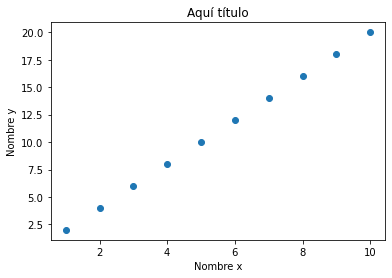

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
elementos = {"horsepower":[1,2,3,4,5,6,7,8,9,10],"price":[2,4,6,8,10,12,14,16,18,20]}
df = pd.DataFrame(elementos)
from scipy import stats
pearson_coef,p_value = stats.pearsonr(df['horsepower'], df['price']) #Así se obtiene el coeficiente y el p-valor
print(pearson_coef,p_value,"\n",df)
y = df["price"]
x = df["horsepower"]
plt.scatter(x,y)
plt.title("Aquí título")
plt.xlabel("Nombre x")
plt.ylabel("Nombre y")

(0.0, 20.900000000000013)

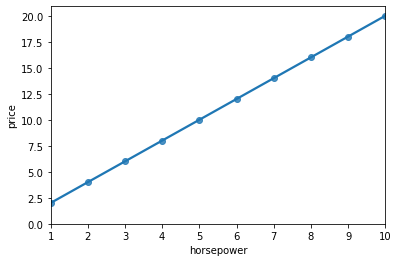

In [ ]:
sns.regplot(x = "horsepower", y = "price", data = df) #Ajusta los datos a un modelo de regresión lineal
plt.ylim(0,)

In [ ]:
pivot = df.corr() #Correlación entre columnas
df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr() #Calcula las correlaciones entre esas columnas

### Asociación entre dos variables categóricas

Se usa chi-cuadrado para averiguar cuán probable es que una distribución se deba a casualidades. Evalúa una hipótesis nula de que las variables son independientes. No dice el tipo de relación entre dos variables, solo que existe.

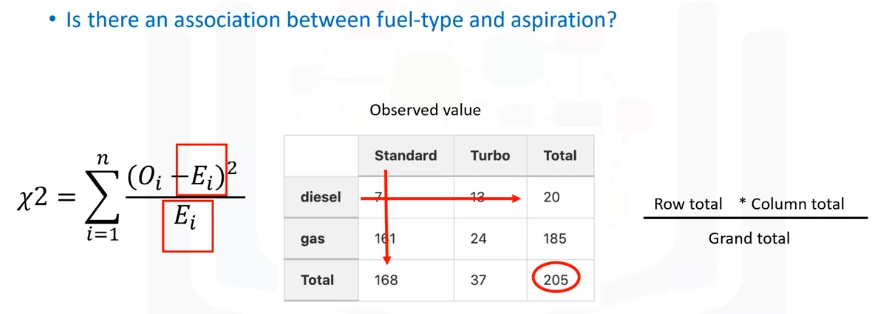

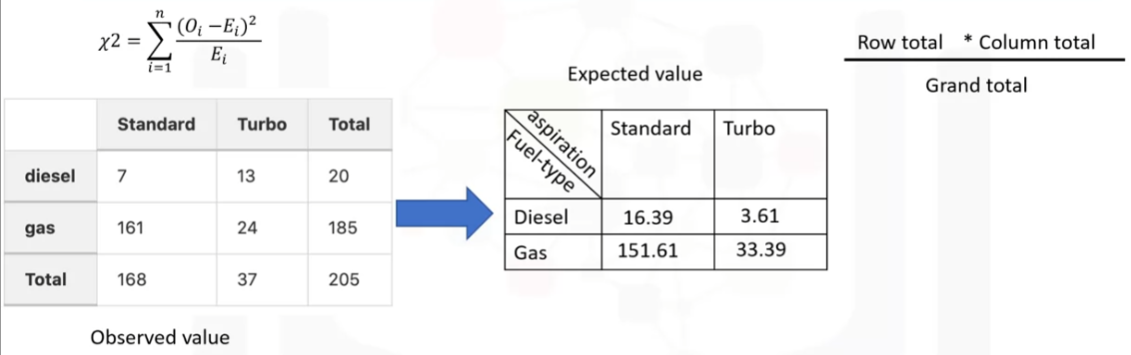

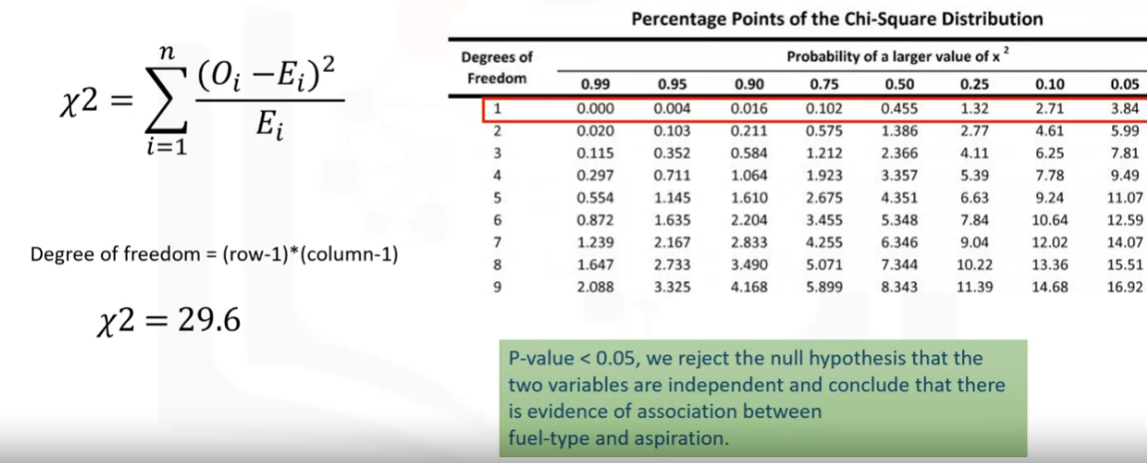

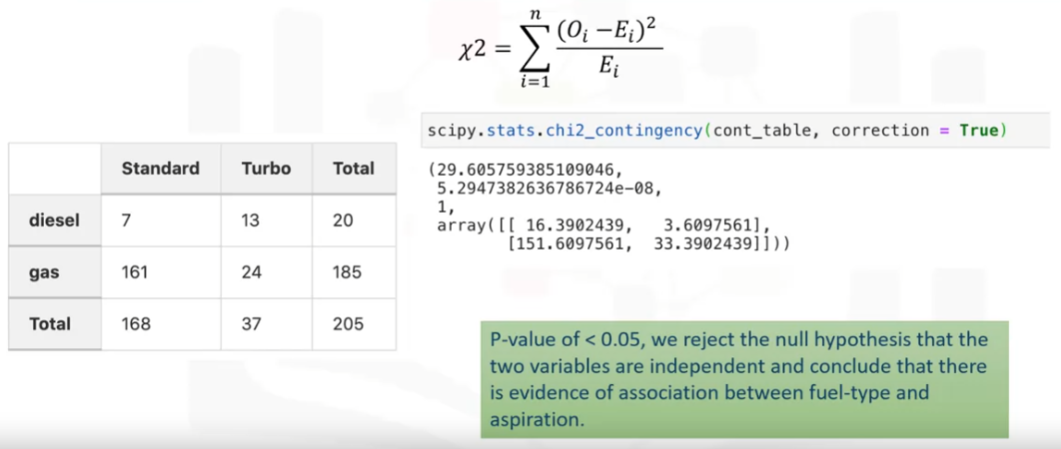

In [ ]:
import scipy.stats
scipy.stats.chi2_contingency(cont_table, correction= True)